In [1]:
import json
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Bad key "axes.color_cycle" on line 29 in
/Users/chuklin/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import lib

In [3]:
%ls testdata/FakeNewsNet/Data/BuzzFeed/RealNewsContent/BuzzFeed_Real_1-Webpage.json

testdata/FakeNewsNet/Data/BuzzFeed/RealNewsContent/BuzzFeed_Real_1-Webpage.json


In [4]:
doc2vec = lib.Doc2Vec('./model/GoogleNews-vectors-negative300-SLIM.bin')

In [27]:
NPOINTS = 30
file_pattern = 'testdata/FakeNewsNet/Data/BuzzFeed/{0:s}NewsContent/BuzzFeed_{0:s}_{1:d}-Webpage.json'

doc_contents = {}
doc_vectors = {}
for group in ['Fake', 'Real']:
    for file_index in range(NPOINTS):
        with open(file_pattern.format(group, file_index + 1)) as f:
            doc = json.load(f)
            contents = '{}\n{}\n{}'.format(doc['title'], doc['text'], ', '.join(doc.get('authors', '')))
            doc_key = '{}_{}'.format(group, file_index)
            doc_contents[doc_key] = contents
            doc_vectors[doc_key] = doc2vec.get_vector(contents)

OOV words: {'a', ',', 's**t', '‘', ':', 'to', '“', 'of', '’'}
OOV words: {'2012', ',', "'Tool", "'", 'to', 'and', 'of', '⋆'}
OOV words: {'a', '”', '.', 'to', '“', '?', '–', 'of', '’'}
OOV words: {'a', '”', ':', 'to', "''", '*', '``', 'and', 'f*g', '.', '“', 'of', '?', 'ree-tards', '’', '100percentfedUp.com'}
OOV words: {'(', ',', '’', "'", '.', 'to', '!', 'Clintons', "'Reporters", ')'}
OOV words: {'Rahami', 'anti-Muslim', ',', '.', '–', 'Anti-Muslim', 'of'}
OOV words: {',', 'then-Secretary', 'pay-to-play', '”', 'to', 'and', '“', '%', '–', '5.7', 'of', ';'}
OOV words: {',', 'scumbags', '.', 'Scumbags', '’'}
OOV words: {',', '2004', '.', '…', '?', 'racist…', '’'}
OOV words: {'Sub-Saharan', '(', ',', 'watered-down', 'a', 'sub-Saharan', '”', ':', 'to', 'and', 'Watered-Down', '“', 'HIV/AIDs', '–', 'of', ')'}
OOV words: {'a', ',', '.', 'to', 'FIGUREHEAD', '9-11', '–', 'of', '’'}
OOV words: {'a', ',', 'brown-skinned', '”', '.', 'to', 'and', '“', 'of', '’'}
OOV words: set()
OOV words: {'do-all

In [28]:
df = pd.DataFrame(doc_vectors)

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

cosines = cosine_similarity(df.values.T)
df_cosines = pd.DataFrame(cosines, columns=df.columns, index=df.columns)
for c in df.columns:
    df_cosines.loc[c, c] = None

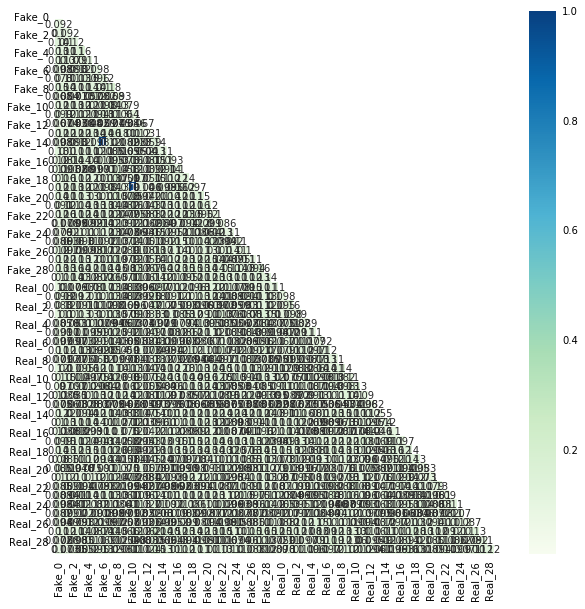

In [30]:
plt.rcParams['figure.figsize']=(10,10)

mask = np.zeros_like(df_cosines)
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(df_cosines, mask=mask, annot=True, cmap="GnBu")

In [31]:
most_similar = df_cosines.idxmax()
for a, b in zip(most_similar.index, most_similar.values):
    print(a, b, df_cosines.loc[a, b])
    print('-' * 80)
    print('{}\n{}\n{}'.format(doc_contents[a][:300], '-' * 80, doc_contents[b][:300]))
    print('=' * 80)

Fake_0 Fake_8 0.14652635929524374
--------------------------------------------------------------------------------
Proof The Mainstream Media Is Manipulating The Election By Taking Bill Clinton Out Of Context
I woke up this morning to find a variation of this headline splashed all over my news feed:

Bill Clinton: ‘Natural’ For Foundation Donors to Seek Favors

Here’s Google:

Naturally, my reaction was “oh, s**
--------------------------------------------------------------------------------
The AP, In 2004, Said Your Boy Obama Was BORN In This Particular Country
Well THAT’S Weird. If the Birther movement is racist… does that mean that the person who wrote this had it in for Obama?

What if that person is … Obama?

Breitbart put this out, taken from the AP, entitled ““Kenyan-born Obama 
Fake_1 Fake_18 0.1644855500440331
--------------------------------------------------------------------------------
Declassified Docs Show That Obama Admin Created ISIS In 2012 To Use As A 'Tool' ⋆ US He